In [1]:
import discretisedfield as df
import oommfc as oc
import micromagneticmodel as mm

In [2]:
import sys
sys.path.append('..')
from simtools import Strip

In [3]:
pattern = 'xixxx'
l = len(pattern) * 200e-9

In [4]:
s = Strip(l, 100e-9, 10e-9, 20e-9, '.', initpattern=pattern)

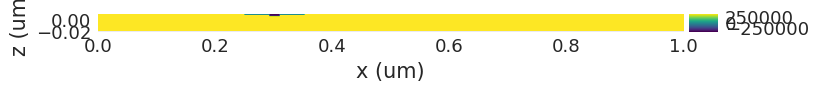

In [5]:
s.system.m.sel('y').z.mpl()

In [6]:
s.system.m.mesh.region.edges

array([1.e-06, 1.e-07, 3.e-08])

In [7]:
s.min_drive(fixed=True)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 17:00]... (29.3 s)


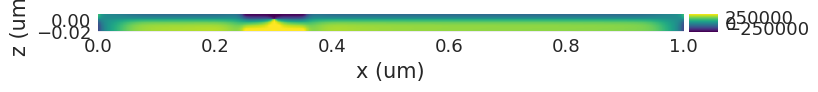

In [8]:
s.system.m.sel('y').z.mpl()

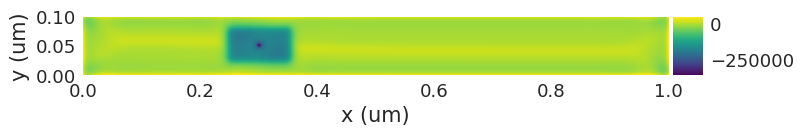

In [9]:
s.system.m.sel(z=1e-9).z.mpl()

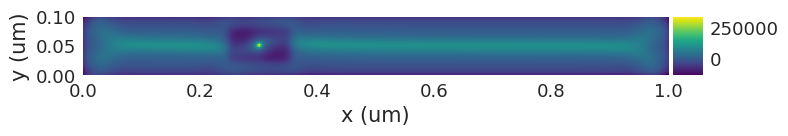

In [10]:
s.system.m.sel(z=-1e-9).z.mpl()

In [11]:
def wedge(x0s, y0, m):
    def init_Ms(p):
        x, y, z = p
        for x0 in x0s:
            if (y - y0) > m * (x - x0) and (y - y0) > -m * (x - x0):
                return 0
        return 384e3
    return init_Ms

field = df.Field(s.system.m.mesh, nvdim=3, value=s.system.m, norm=wedge([200e-9, 400e-9, 600e-9, 800e-9], 70e-9, 1), valid='norm')

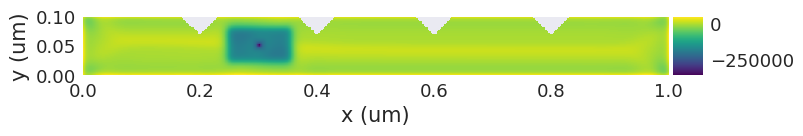

In [12]:
field.sel(z=1e-9).z.mpl()

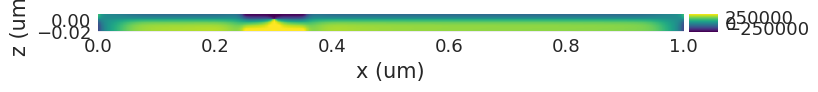

In [13]:
s.system.m = field
s.system.m.sel('y').z.mpl()

In [14]:
s.min_drive()

Running OOMMF (ExeOOMMFRunner)[2023/07/16 17:01]... (39.2 s)


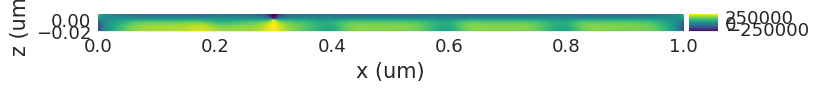

In [15]:
s.system.m.sel('y').z.mpl()

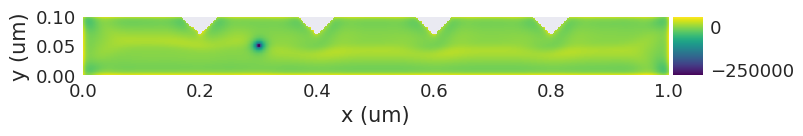

In [16]:
s.system.m.sel(z=1e-9).z.mpl()

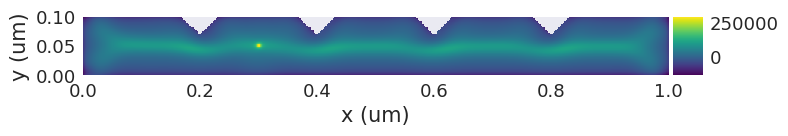

In [17]:
s.system.m.sel(z=-1e-9).z.mpl()

---
---

In [18]:
s.system.dynamics += mm.ZhangLi(u=(1, 0, 0), beta=0.56)

---

In [19]:
j_distribution = df.Field.from_file('current-profile.omf')

In [20]:
j_distribution.valid = 'norm'

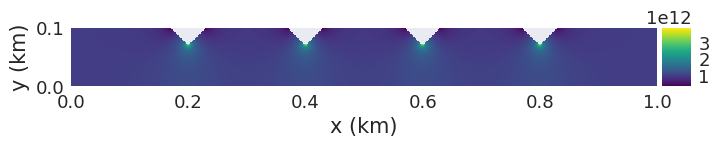

In [21]:
j_distribution.sel('z').norm.mpl()

In [22]:
j0_mean = j_distribution.norm.sel(x=(0, 150)).mean()
j0_mean

array([1.0005296e+12])

In [23]:
muB = 9.274e-24

def J2ux(J, P=.5):
    Ms = Strip.FeGe['Ms']
    return J * P * mm.consts.g * muB / (2 * mm.consts.e * Ms)

---

In [24]:
# j = 5e11
u_field = df.Field(s.system.m.mesh, nvdim=3, value=J2ux(j_distribution.array / 2), valid='norm')

In [25]:
s.system.dynamics.zhangli.u = u_field

In [26]:
td = oc.TimeDriver()

In [27]:
td.drive(s.system, t=2e-9, n=40)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 17:02]... (1685.3 s)


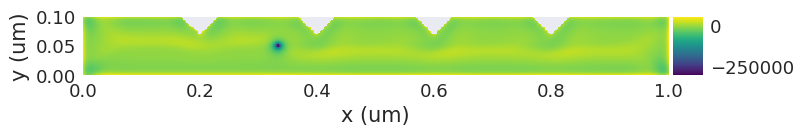

In [28]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [29]:
# j = 4e12
u_field = df.Field(s.system.m.mesh, nvdim=3, value=J2ux(j_distribution.array * 4), valid='norm')

In [30]:
s.system.dynamics.zhangli.u = u_field

In [31]:
td.drive(s.system, t=0.20e-9, n=10)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 17:30]... (165.3 s)


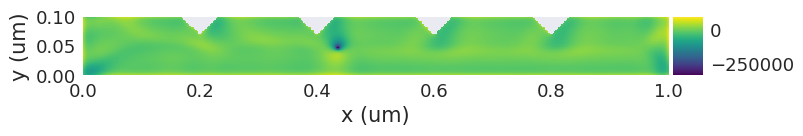

In [32]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [33]:
s.system.dynamics -= s.system.dynamics.zhangli

In [34]:
s.system.dynamics

Damping(alpha=0.28) + Precession(gamma0=221276.14872118403)

In [35]:
td.drive(s.system, t=2e-9, n=40)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 17:32]... (751.2 s)


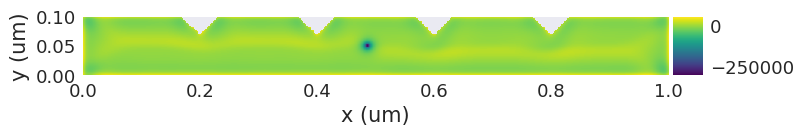

In [36]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [37]:
s.system.dynamics += mm.ZhangLi(u=(1, 0, 0), beta=0.56)

In [38]:
# j = 5e11
u_field = df.Field(s.system.m.mesh, nvdim=3, value=J2ux(j_distribution.array / 2), valid='norm')

In [39]:
s.system.dynamics.zhangli.u = u_field

In [40]:
td.drive(s.system, t=2e-9, n=40)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 17:45]... (1815.1 s)


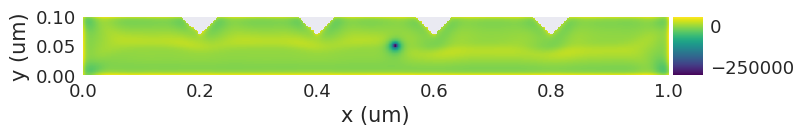

In [41]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [42]:
# j = 4e12
u_field = df.Field(s.system.m.mesh, nvdim=3, value=J2ux(j_distribution.array * 4), valid='norm')

In [43]:
s.system.dynamics.zhangli.u = u_field

In [44]:
td.drive(s.system, t=0.2e-9, n=10)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 18:15]... (161.7 s)


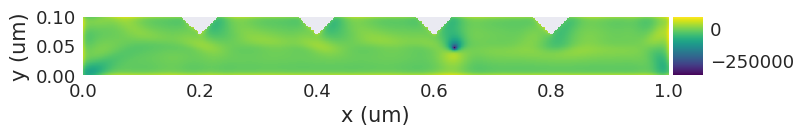

In [45]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [46]:
s.system.dynamics -= s.system.dynamics.zhangli

In [47]:
td.drive(s.system, t=2e-9, n=40)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 18:18]... (735.2 s)


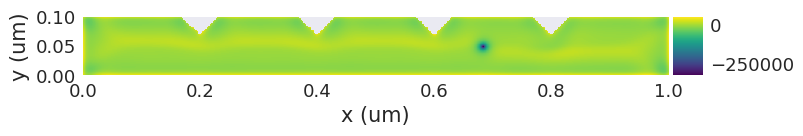

In [48]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [49]:
s.system.dynamics += mm.ZhangLi(u=(1, 0, 0), beta=0.56)

In [50]:
# j = 5e11
u_field = df.Field(s.system.m.mesh, nvdim=3, value=J2ux(j_distribution.array / 2), valid='norm')

In [51]:
s.system.dynamics.zhangli.u = u_field

In [52]:
td.drive(s.system, t=2e-9, n=40)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 18:30]... (1728.4 s)


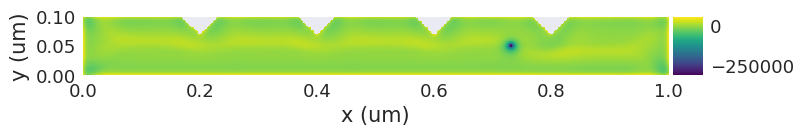

In [53]:
s.system.m.sel(z=1e-9).z.mpl()